<a href="https://colab.research.google.com/github/Kolexx/20DayDataProject_1/blob/main/Unlocking_Insights_from_Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# df = pd.read_excel('online_retail_II.xlsx', engine='openpyxl')
sheets = pd.ExcelFile('online_retail_II.xlsx')
print("Available Sheets:", sheets.sheet_names)

Available Sheets: ['Year 2009-2010', 'Year 2010-2011']


In [4]:
data_2009_2010 = pd.read_excel('online_retail_II.xlsx', sheet_name=sheets.sheet_names[0])
data_2010_2011 = pd.read_excel('online_retail_II.xlsx', sheet_name=sheets.sheet_names[1])

In [5]:
data_2009_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
data_2010_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
print(data_2010_2011.isnull().sum())


Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [8]:
print(data_2009_2010.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [9]:
df1 = data_2010_2011.dropna(subset=['Invoice',	'StockCode',	'Description',	'Quantity',	'InvoiceDate',	'Price',	'Customer ID', 'Country'],  inplace= False)

In [10]:
df2 = data_2009_2010.dropna(subset=['Invoice',	'StockCode',	'Description',	'Quantity',	'InvoiceDate',	'Price',	'Customer ID', 'Country'],  inplace= False)

In [11]:
data = pd.concat([df1, df2])
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
data['year'] = pd.to_datetime(data['InvoiceDate']).dt.year
data['year'].unique()

array([2010, 2011, 2009], dtype=int32)

In [13]:
data['TotalPrice'] = data['Quantity'] * data['Price']
median_price = data['Price'].median()
median_quantity = data['Quantity'].median()
median_total_value = median_price * median_quantity
data['HighValue'] = (data['TotalPrice'] > median_total_value).astype(int)
data


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,TotalPrice,HighValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010,5.90,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,3.75,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,3.75,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010,7.50,0


In [14]:
data.drop_duplicates()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,TotalPrice,HighValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1
...,...,...,...,...,...,...,...,...,...,...,...
502933,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,25.20,1
502934,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,15.90,1
502935,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,15.00,1
502936,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,50.40,1


In [15]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID,year,TotalPrice,HighValue
count,824364.000000,824364,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,2011-01-01 22:29:28.042054144,3.676800,15324.638504,2010.422410,20.195317,0.572207
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009.000000,-168469.600000,0.000000
25%,2.000000,2010-07-06 11:58:00,1.250000,13975.000000,2010.000000,4.250000,0.000000
50%,5.000000,2010-12-03 14:26:00,1.950000,15255.000000,2010.000000,11.250000,1.000000
75%,12.000000,2011-07-27 15:14:00,3.750000,16797.000000,2011.000000,19.500000,1.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,168469.600000,1.000000
std,188.976099,NaN,70.241388,1697.464450,0.566598,308.685001,0.494759


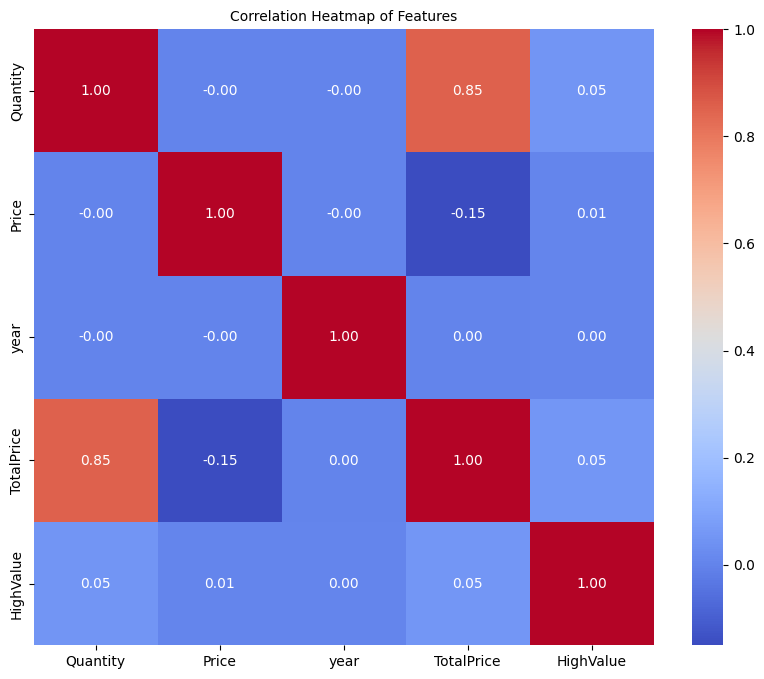

In [17]:
numerical_columns = ['Quantity', 'Price', 'year', 'TotalPrice', 'HighValue']

correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=10)
plt.show()

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Quantity', 'Price', 'TotalPrice', 'HighValue']])
data_scaled[:5]


array([[-3.39438589e-02, -1.60418280e-02, -1.58586263e-02,
         8.64649498e-01],
       [-3.39438589e-02, -4.08305932e-03,  4.68707532e-04,
         8.64649498e-01],
       [-2.33605035e-02, -1.31945022e-02,  5.84636113e-03,
         8.64649498e-01],
       [-3.39438589e-02, -4.08305932e-03,  4.68707532e-04,
         8.64649498e-01],
       [-3.39438589e-02, -4.08305932e-03,  4.68707532e-04,
         8.64649498e-01]])

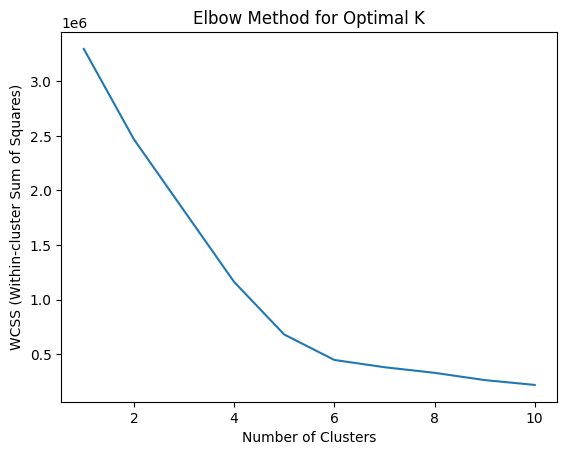

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,TotalPrice,HighValue,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,1,0


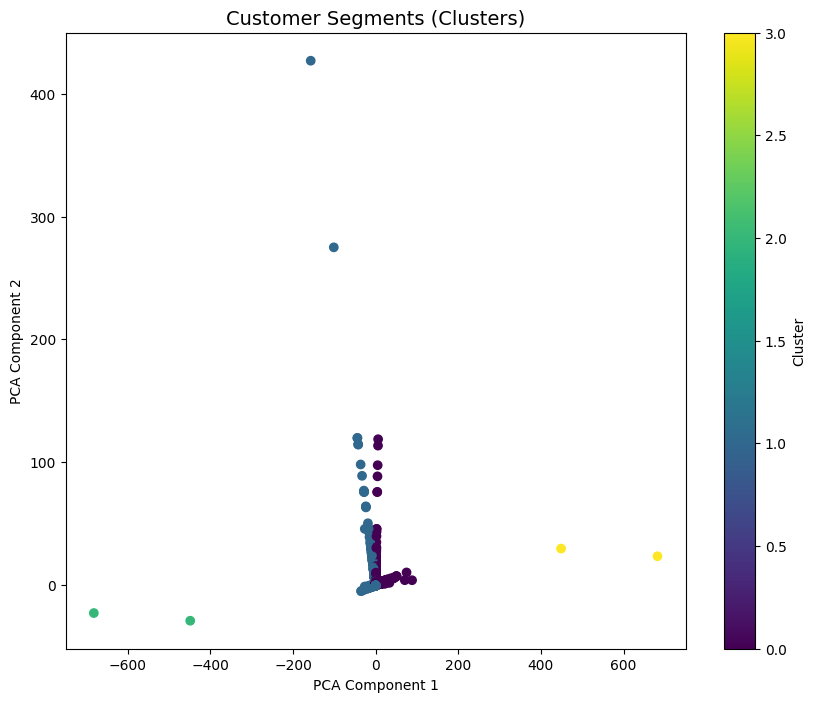

In [ ]:
# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments (Clusters)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [20]:
cluster_summary = data.groupby('Cluster')[['Quantity', 'Price', 'TotalPrice', 'HighValue']].mean()
print(cluster_summary)


KeyError: 'Cluster'